### Day - 12 : catagorical and numerical column analysis
***Today's Goal:*** - work on catagorical columns in visual formats - work on numerical columns and find outliers

#### CATAGORICAL ANALYSIS & TRENDS

#### load the data 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [20]:
# read the data 
df = pd.read_csv(r"C:\Users\MALWADE TANYA\Downloads\titles.csv")
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [22]:
cat = df.select_dtypes(include='object').columns
cat

Index(['id', 'title', 'type', 'description', 'age_certification', 'genres',
       'production_countries', 'imdb_id'],
      dtype='object')

we will work on title , type , genres , production_countries

#### Movies vs TV Shows

In [6]:
df['type'].value_counts()

type
MOVIE    3759
SHOW     2047
Name: count, dtype: int64

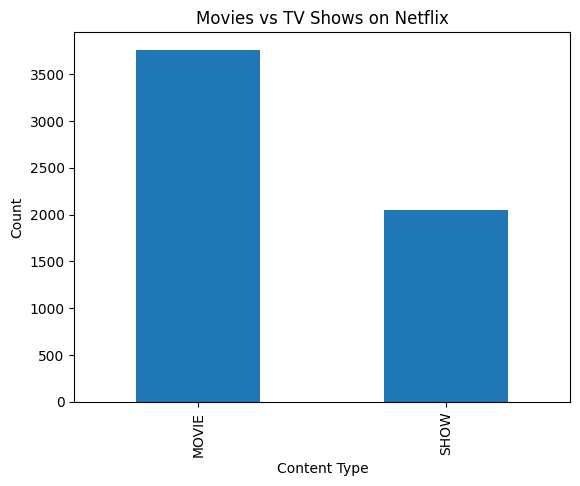

In [7]:
df['type'].value_counts().plot(kind='bar')
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()


***The majority of Netflix content consists of movies rather than TV shows.***

### Trend of Content Over the Years

In [8]:
year_trend = df['release_year'].value_counts().sort_index()

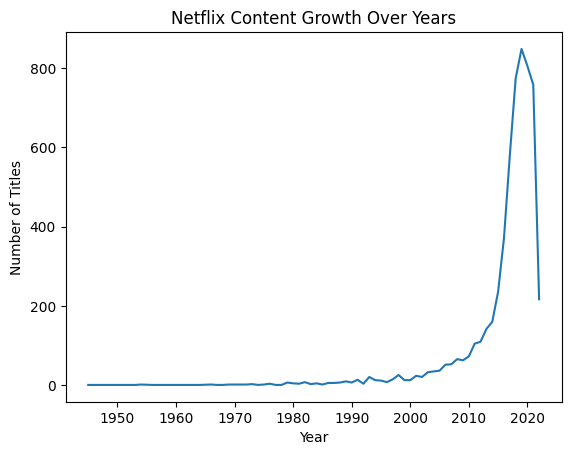

In [9]:
year_trend.plot()
plt.title("Netflix Content Growth Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

***The majority of Netflix content created in 2000 to 2020.***

### Most Common Genres

In [10]:
df['genres'].value_counts().head(10)


genres
['comedy']                     510
['drama']                      350
['documentation']              320
['comedy', 'drama']            141
['drama', 'comedy']            128
['reality']                    120
['drama', 'romance']           112
['comedy', 'documentation']     93
['animation']                   69
[]                              68
Name: count, dtype: int64

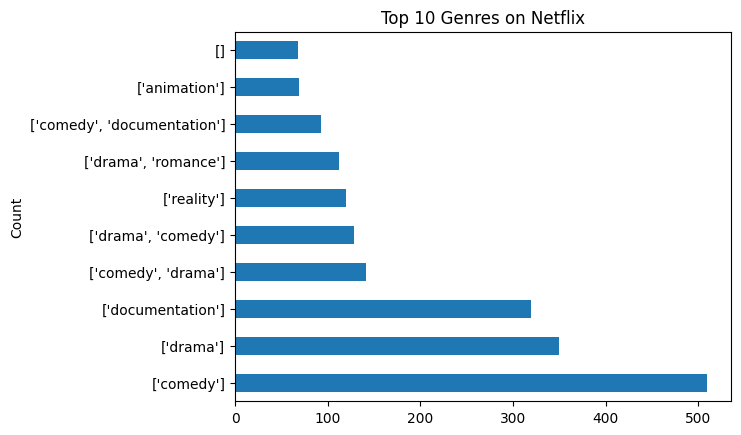

In [16]:
df['genres'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Genres on Netflix")
plt.ylabel("Count")
plt.show()

***The majority of Netflix content consists comedy movies than other shows.***

### Top Content Producing Countriesm

In [17]:
df['production_countries'].value_counts().head(10)


production_countries
['US']    1950
['IN']     605
['JP']     266
[]         232
['GB']     219
['KR']     210
['ES']     159
['FR']     124
['CA']     103
['MX']      95
Name: count, dtype: int64

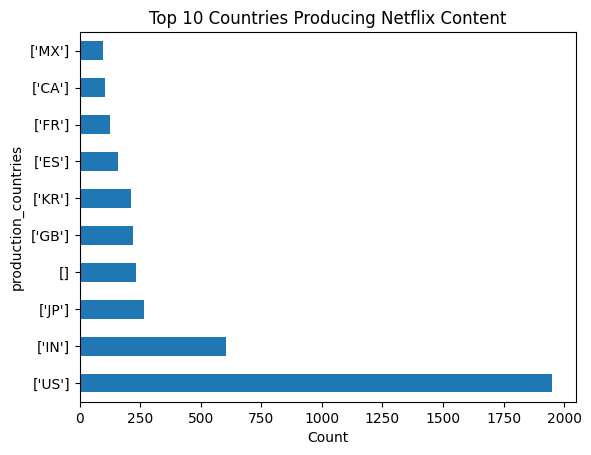

In [18]:
df['production_countries'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Count")
plt.show()

***The majority of Netflix content producing in US country.***

### OUTLIER DETECTION (NUMERICAL COLUMNS)

In [24]:
num = df.select_dtypes(exclude='object').columns
num

Index(['release_year', 'runtime', 'seasons', 'imdb_score', 'imdb_votes',
       'tmdb_popularity', 'tmdb_score'],
      dtype='object')

we work on runtime, imdb_score, imdb_votes, tmdb_popularity, tmdb_score, seasons


In [29]:
num_cols = ['runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'seasons']

#### METHOD 1: IQR Method

In [34]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Number of runtime outliers in '{col}':", outliers.shape[0])

Number of runtime outliers in 'runtime': 15
Number of runtime outliers in 'imdb_score': 64
Number of runtime outliers in 'imdb_votes': 804
Number of runtime outliers in 'tmdb_popularity': 663
Number of runtime outliers in 'tmdb_score': 149
Number of runtime outliers in 'seasons': 305


#### METHOD 2: Boxplot

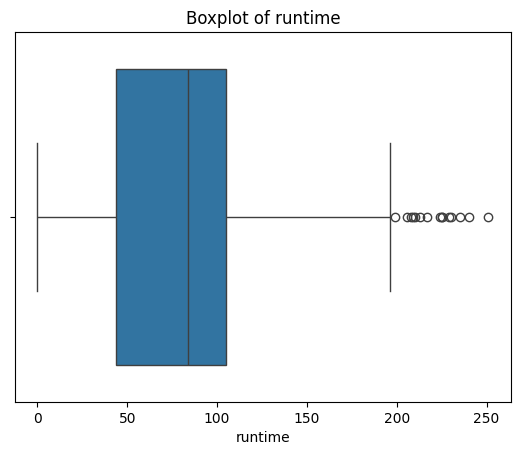

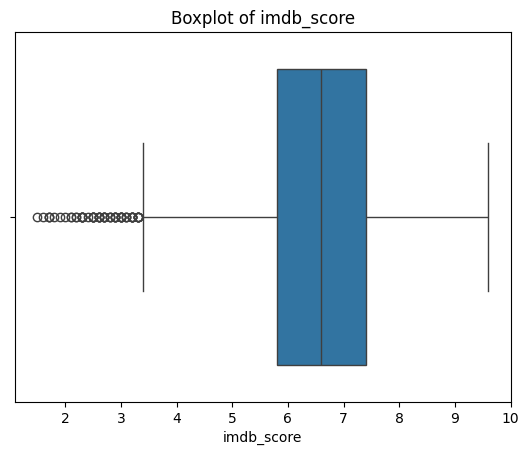

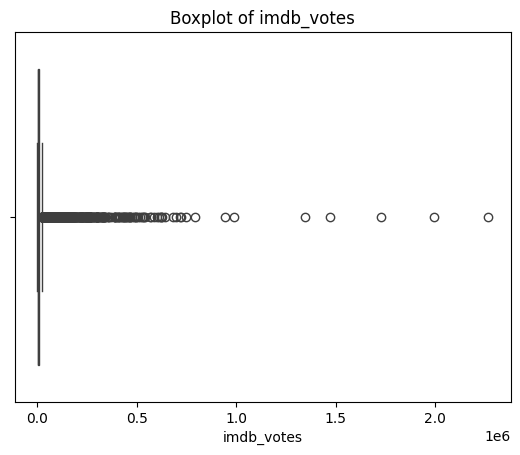

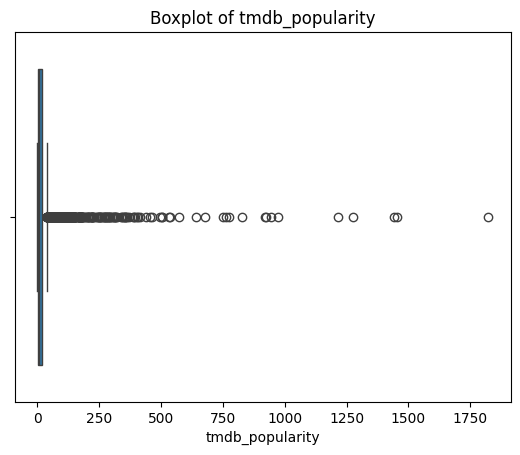

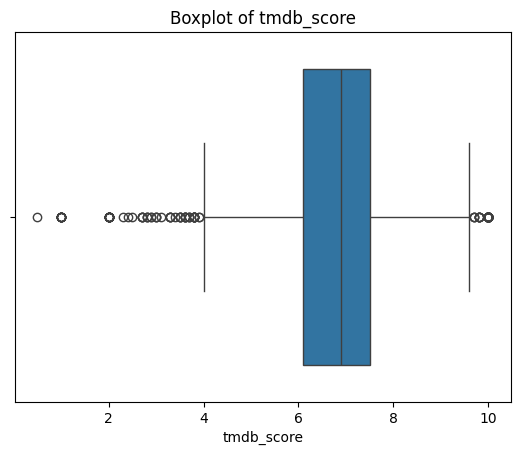

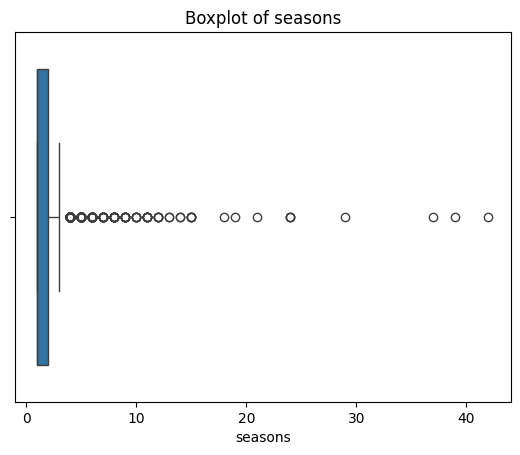

In [30]:
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


***Dots far away from the box = outliers***

#### Learnings
- Performed categorical analysis to understand the distribution of content types, genres, and production countries.
- Analyzed year-wise trends to observe how the number of Netflix titles has changed over time.
- Understood that categorical analysis focuses on counts and patterns rather than numerical values.
- Learned that outlier detection is mainly required for numerical features, not categorical data.
- Used boxplots to visually identify extreme values in numerical columns.
- Applied the IQR (Interquartile Range) method to statistically detect outliers.
- Recognized that outliers may represent unusual but valid data and should be interpreted before removal.